# Business Understanding

## Project Domain

Domain: Agriculture & Precision Farming
Sub-Domain: Smart Farming & Decision Support Systems

Sistem rekomendasi tanaman (Crop Recommendation System) termasuk dalam bidang pertanian presisi (precision agriculture) yang memanfaatkan data science dan machine learning untuk membantu petani memilih tanaman yang paling sesuai berdasarkan kondisi tanah dan iklim.

Domain: Food Quality Monitoring & Predictive Analytics

Prediksi kualitas susu (Milk Quality Prediction) termasuk dalam sektor industri susu yang modern, di mana teknologi seperti machine learning dimanfaatkan untuk menjaga mutu produk dari hulu ke hilir. Dengan pendekatan ini, produsen susu dapat mendeteksi lebih awal apakah susu memenuhi standar kualitas sebelum masuk ke proses distribusi, sehingga mengurangi risiko kerugian dan menjaga kepercayaan konsumen.

## Problem Statements

Masalah yang Dihadapi:


1. Variasi Kualitias Susu yang Tidak Konsisten


* Kualitas susu sangat dipengaruhi oleh berbagai faktor seperti kesehatan sapi, pakan, dan kondisi lingkungan. Tanpa pemantauan yang cermat, kualitas susu dapat bervariasi secara signifikan dari waktu ke waktu.


2. Proses Pemerikasaan Manual yang Lambat dan Mahal


* Pengujian kualitas secara laboratorium memerlukan waktu dan biaya tinggi, yang tidak selalu efisien untuk produsen skala menengah dan kecil.

3. Kurangnya Sistem Prediktif yang Real-Time

* Mayoritas peternakan atau industri pengolahan susu belum memiliki sistem otomatis untuk memprediksi kualitas susu secara cepat sebelum proses pengolahan atau pengiriman.

4. Risiko Kesehatan dan Kerugian Bisnis

* Produk berkualitas rendah yang tidak terdeteksi sejak awal bisa berdampak pada kesehatan konsumen serta menurunkan reputasi dan pendapatan produsen.

## Goals

Tujuan dari proyek ini adalah untuk membangun sistem prediksi kualitas susu berbasis machine learning yang:

* Dapat mengklasifikasikan kualitas susu menjadi baik, sedang, atau buruk berdasarkan parameter kimia seperti pH, suhu, rasa, dan tingkat kejernihan.

* Memberikan informasi yang cepat dan akurat kepada produsen untuk pengambilan keputusan.

* Mengurangi ketergantungan pada pemeriksaan manual atau laboratorium.

* Mendukung rantai pasok susu yang lebih efisien, aman, dan berkualitas tinggi.

## Solustion Statements

* Menerima input parameter dari pengukuran lapangan atau sensor.

* Mengolah data menggunakan algoritma klasifikasi seperti Decision Tree, Random Forest, atau SVM.

* Menghasilkan prediksi kualitas susu secara otomatis dan instan.

* Dapat diintegrasikan ke dalam sistem manajemen peternakan atau aplikasi pemantauan kualitas.

# Data Understanding

## Import Data dari Kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riscoakbar","key":"ec6fb21228fddf3e891a8706e8558893"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d cpluzshrijayan/milkquality

Dataset URL: https://www.kaggle.com/datasets/cpluzshrijayan/milkquality
License(s): unknown


In [5]:
!mkdir milkquality
!unzip milkquality.zip -d milkquality
!ls milkquality

Archive:  milkquality.zip
  inflating: milkquality/milknew.csv  
milknew.csv


## Import Library yang dibutuhkan

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

## Exploratory Data Analysis

In [7]:
df = pd.read_csv("milkquality/milknew.csv")

In [8]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


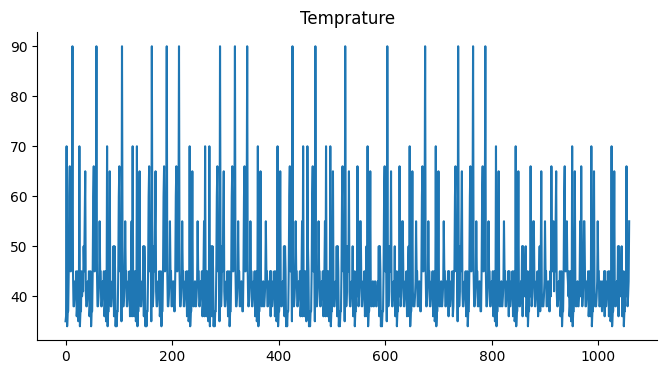

In [13]:
# @title Temprature

from matplotlib import pyplot as plt
df['Temprature'].plot(kind='line', figsize=(8, 4), title='Temprature')
plt.gca().spines[['top', 'right']].set_visible(False)

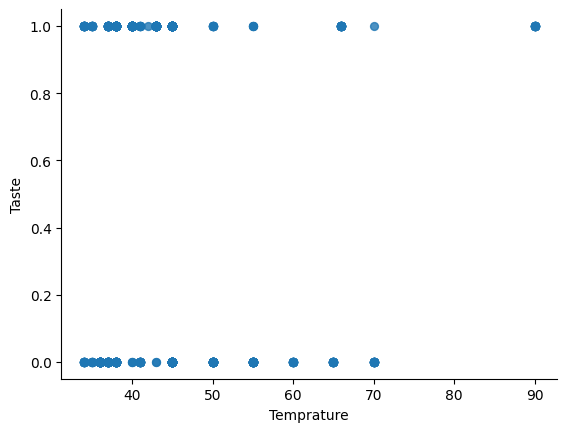

In [12]:
# @title Temprature vs Taste

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Temprature', y='Taste', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-11-a5ae4186d893>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Temprature', y='Grade', inner='box', palette='Dark2')


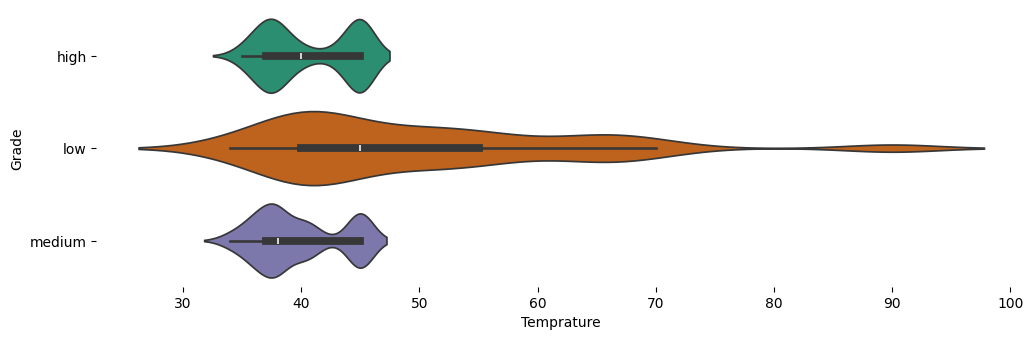

In [11]:
# @title Grade vs Temprature

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Grade'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Temprature', y='Grade', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

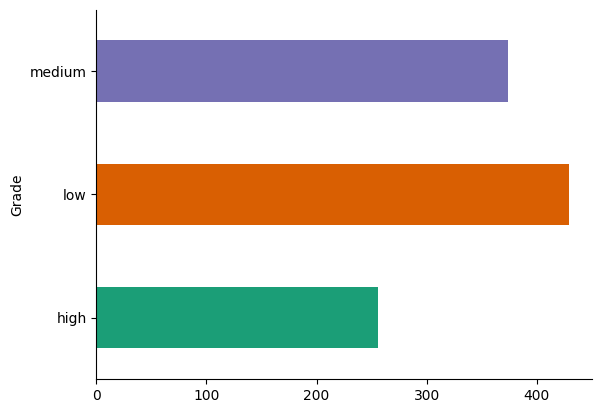

In [10]:
# @title Grade

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Grade').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

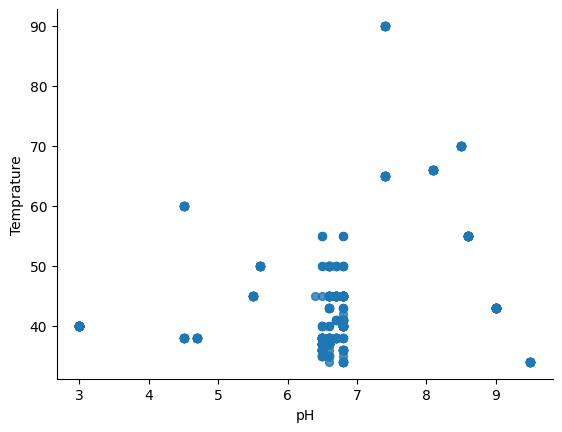

In [9]:
# @title pH vs Temprature

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='pH', y='Temprature', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


# Data Preparation

In [15]:
# pisahkan fitur dan target
X = df.drop(columns=["Grade"])
y = df["Grade"]

In [16]:
# Encode label target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [17]:
# Normalisasi fitur
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Bagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y_encoded,
                                                    test_size=0.2,
                                                    random_state=42)

# Modeling

In [19]:
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(len(le.classes_), activation="softmax")
])

In [20]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,459 (44.76 KB)

 Trainable params: 11,459 (44.76 KB)

 Non-trainable params: 0 (0.00 B)

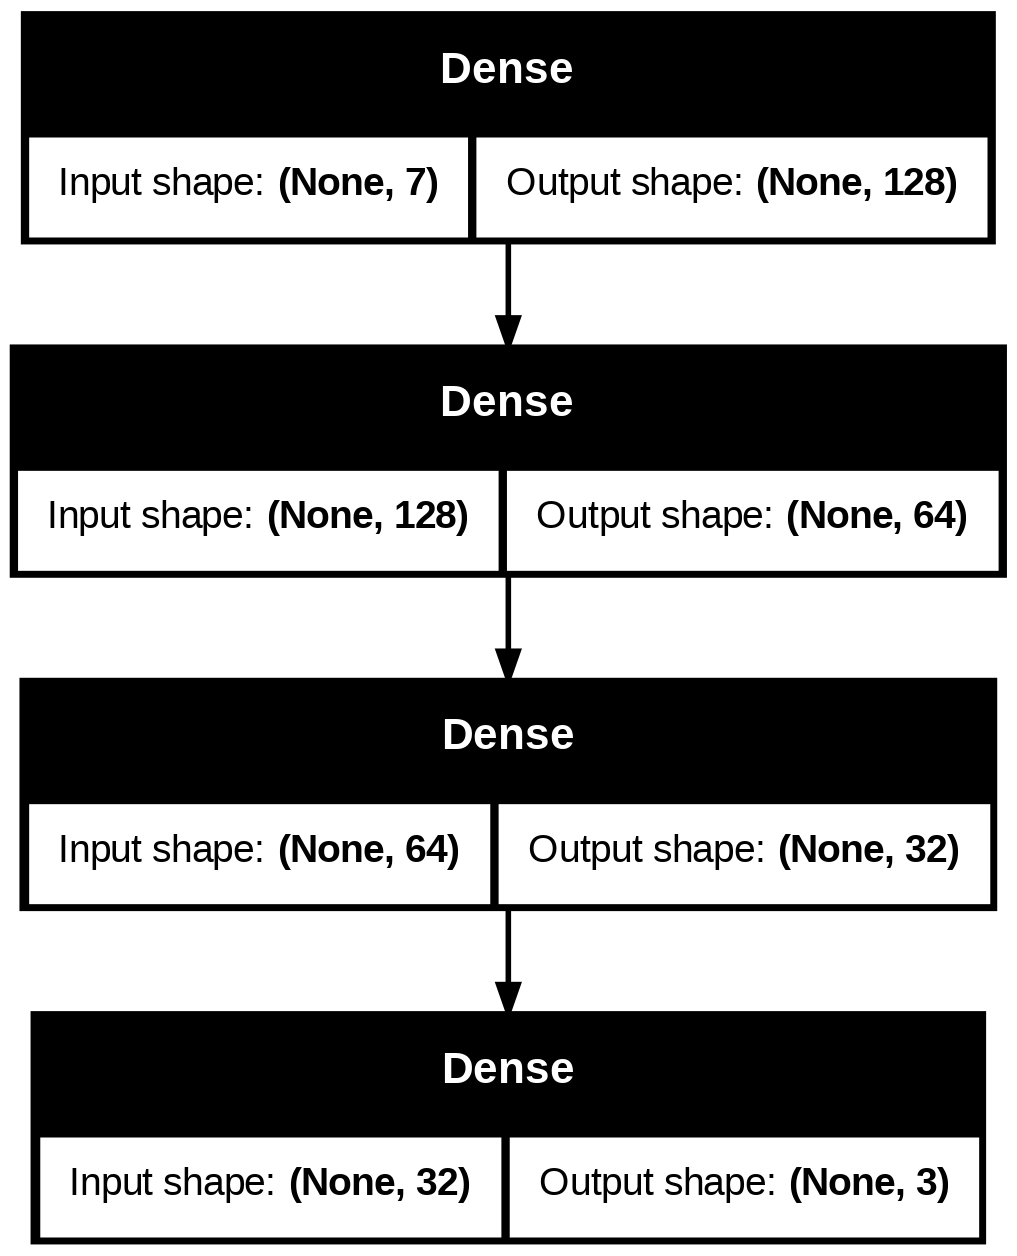

In [22]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [23]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_data=(X_test, y_test))

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4530 - loss: 1.0150 - val_accuracy: 0.6934 - val_loss: 0.7802
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6901 - loss: 0.6973 - val_accuracy: 0.7311 - val_loss: 0.5423
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8068 - loss: 0.4644 - val_accuracy: 0.8538 - val_loss: 0.3834
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8697 - loss: 0.3584 - val_accuracy: 0.8821 - val_loss: 0.3068
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9053 - loss: 0.2743 - val_accuracy: 0.9057 - val_loss: 0.2711
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9296 - loss: 0.2332 - val_accuracy: 0.9057 - val_loss: 0.2249
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9479 - loss: 0.1795 - val_accuracy: 0.9198 - val_loss: 0.2229
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9408 - loss: 0.1727 - val_accuracy: 0.9245 - val_loss:

# Evaluation

In [24]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Akurasi Model: {test_accuracy:.4f}")
print(f"Loss Model: {test_loss:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9363 - loss: 0.1405 
Akurasi Model: 0.9434
Loss Model: 0.1044


In [25]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

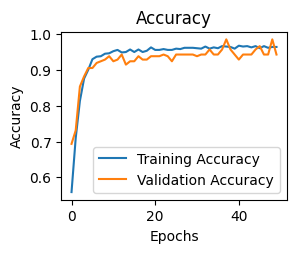

In [26]:
plt.subplot(2, 2, 4)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

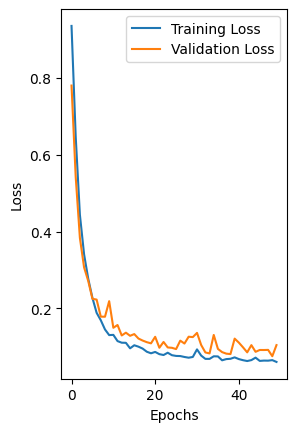

In [27]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


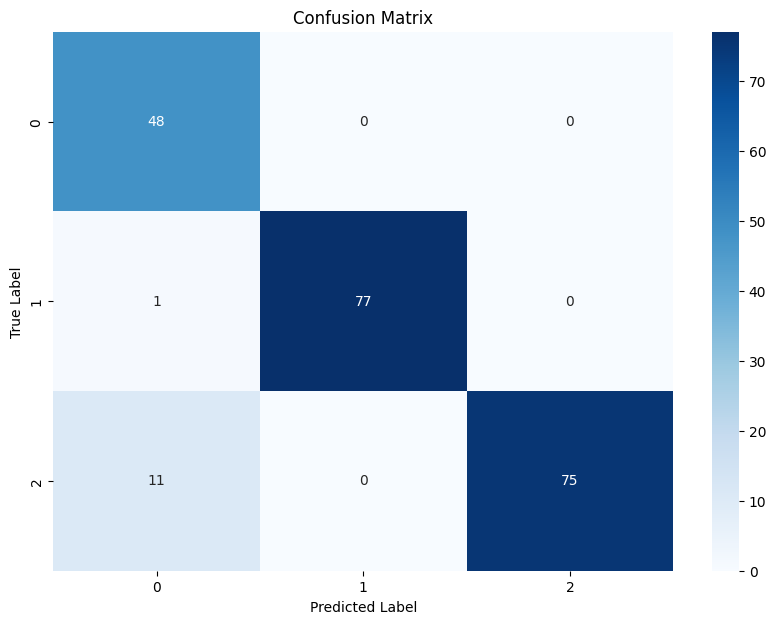

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        48
           1       1.00      0.99      0.99        78
           2       1.00      0.87      0.93        86

    accuracy                           0.94       212
   macro avg       0.93      0.95      0.94       212
weighted avg       0.95      0.94      0.94       212



In [28]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Deployment

## Model Simulation

In [29]:
sample_input = np.array([[8.2,27,0,1,1,0,255]])
sample_input_df = pd.DataFrame(sample_input)

In [30]:
sample_input_scaled = scaler.transform(sample_input_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [31]:
predicted_class = np.argmax(model.predict(sample_input_scaled))
predicted_crop = le.inverse_transform([predicted_class])

print(f"Kualitas Susus: {predicted_crop[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Kualitas Susus: medium


## Save Model

In [32]:
# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model
with open('milkquality.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmptbyxtpiw'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 7), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  138674301690576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138674301694608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138672605094416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138672605099216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138672605093264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138672605098064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138672605090192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138672605090576: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [33]:
# Simpan label encoder dan scaler
import joblib
joblib.dump(le, 'label_encode.pkl')
joblib.dump(scaler, 'scale.pkl')

['scale.pkl']